# Scenario A: The Triple Mound

Goal: Go from $(0,0)$ to $(3.5, 0)$.
Constraint: Final speed at hole must be $0.1$ m/s.

In [1]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

import numpy as np
import matplotlib.pyplot as plt
from surfaces import ScenarioA
from physics import PhysicsEngine
from solver import ShootingSolver
from utils import plot_trajectory

In [2]:
surface = ScenarioA()
physics = PhysicsEngine(surface)
solver = ShootingSolver(physics)

target_pos = np.array([3.5, 0.0])
target_speed = 0.1

def objective(params):
    vx0, vy0, T = params
    if T <= 0:
        return [100, 100, 100]
        
    initial_state = [0, 0, vx0, vy0]
    sol = solver.integrate(initial_state, [0, T])
    
    xf, yf, vxf, vyf = sol.y[:, -1]
    
    # Calculate vzf
    grad = surface.gradient(xf, yf)
    vzf = vxf * grad[0] + vyf * grad[1]
    vf = np.sqrt(vxf**2 + vyf**2 + vzf**2)
    
    return [xf - target_pos[0], yf - target_pos[1], vf - target_speed]

# Initial guess [vx0, vy0, T]
guess = [2.0, 0.5, 3.0]

sol_root = solver.solve(objective, guess)

print("Solution:", sol_root.x)
print("Success:", sol_root.success)
print("Message:", sol_root.message)

Solution: [2.24886505 0.4995229  3.14044   ]
Success: True
Message: The solution converged.


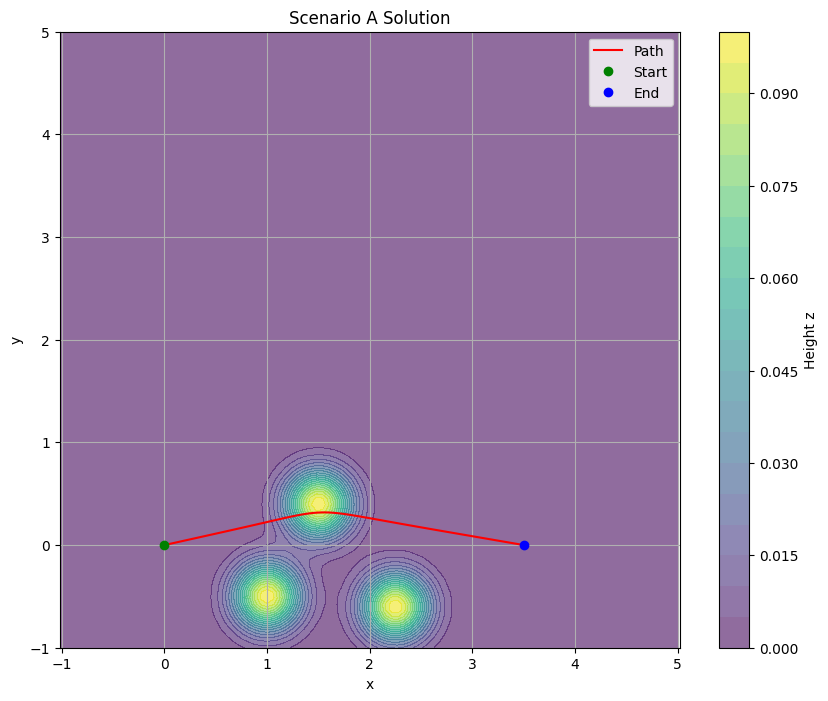

Final Position: (3.5000, 0.0000)
Final Speed: 0.1000 m/s


In [3]:
if sol_root.success:
    vx0, vy0, T = sol_root.x
    initial_state = [0, 0, vx0, vy0]
    sol_path = solver.integrate(initial_state, [0, T])
    plot_trajectory(surface, sol_path, title="Scenario A Solution")
    print(f"Final Position: ({sol_path.y[0][-1]:.4f}, {sol_path.y[1][-1]:.4f})")
    
    # Verify speed
    xf, yf, vxf, vyf = sol_path.y[:, -1]
    grad = surface.gradient(xf, yf)
    vzf = vxf * grad[0] + vyf * grad[1]
    vf = np.sqrt(vxf**2 + vyf**2 + vzf**2)
    print(f"Final Speed: {vf:.4f} m/s")